## Exercise-2

Wenfeng Zhu-Computer Vision and Deep Learning: Visual Synthesis

### Importing the necessary libraries

In [16]:
import numpy as np
import sklearn.datasets
import sklearn.neighbors
import matplotlib.pyplot as plt

### Data generation

In [17]:
def make_data(noise=0.2, outlier=1):
    prng = np.random.RandomState(0)
    n = 500

    x0 = np.array([0, 0])[None, :] + noise * prng.randn(n, 2)
    y0 = np.ones(n)
    x1 = np.array([1, 1])[None, :] + noise * prng.randn(n, 2)
    y1 = -1 * np.ones(n)

    x = np.concatenate([x0, x1])
    y = np.concatenate([y0, y1]).astype(np.int32)

    xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(
        x, y, test_size=0.1, shuffle=True, random_state=0)
    xplot, yplot = xtrain, ytrain

    outlier = outlier * np.array([1, 1.75])[None, :]
    youtlier = np.array([-1])
    xtrain = np.concatenate([xtrain, outlier])
    ytrain = np.concatenate([ytrain, youtlier])
    return xtrain, xtest, ytrain, ytest, xplot, yplot

### Task-1: Linear Least Squares

1. **Derive the following formula for the minimizer w∗ of L**

As shown in the task description, the loss function of w is:
$$
L(w)= \frac 12||X_w-y||_2^2
$$
So we have to take the first order partial derivative of the function and make the partial derivative 0.\
And its corresponding norm operation can be transformed into:
$$
L(w)= \frac 12(Xw-y)^T(Xw-y)
$$
The derivative of this equation and make it to be 0:
$$
\frac {d}{dw} L(w)= X^T(Xw-y)=0
$$
Then we get:
$$
X^TXw=X^Ty
$$
We know that $ X^TX $ is  square matrix and its multiplication by its own inverse matrix is the unit matrix, so we can conclude that:
$$
w^* = (X^TX)^{-1}X^Ty
$$

2. **Implement the computation of w∗ in the fit method of LinearLeastSquares in the file task1.py.**
3. **Implement the predict method of the class LinearLeastSquares in the file task1.py returning class predictions according to the sign of f(·,w∗)**

In [18]:
class LinearLeastSquares(object):
    def __init__(self):
        self.w = []

    def fit(self, x, y):
        # TODO find minimizer of least squares objective
        x_bias = np.c_[x, np.ones(len(x))]
        self.w = (np.linalg.inv(x_bias.T @ x_bias) @ x_bias.T @ y)

    def predict(self, xquery):
        # TODO implement prediction using linear score function
        y_predict = np.sign(np.c_[xquery, np.ones(len(xquery))] @ self.w)
        return y_predict

4. **Visualize the training dataset (including the outlier in xtrain).**
5. **Fit your implementation of LinearLeastSquares to the training data, evaluate its accuracy on the test data and plot its decision boundary as well as the test data within the box [−1.5, 2.5] × [−1.0, 1.5].**

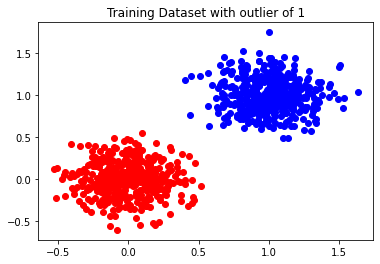

The accuracy rate of 1 outlier is:  1.0


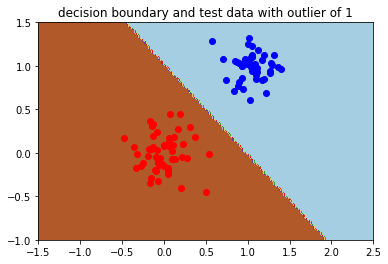

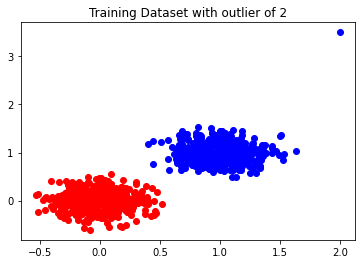

The accuracy rate of 2 outlier is:  1.0


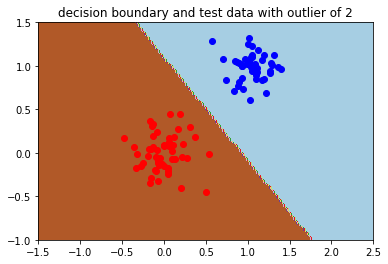

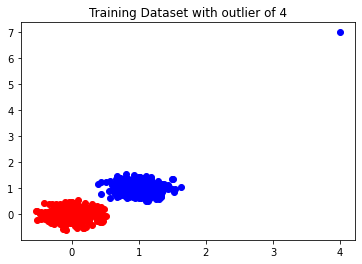

The accuracy rate of 4 outlier is:  1.0


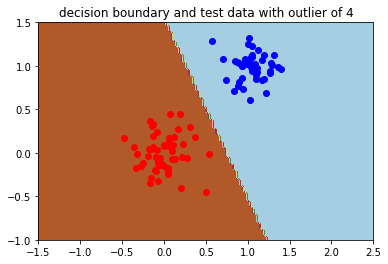

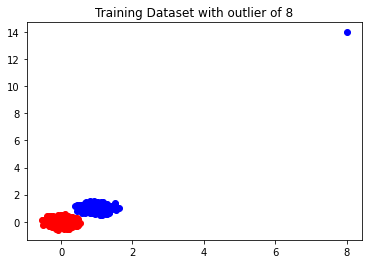

The accuracy rate of 8 outlier is:  0.98


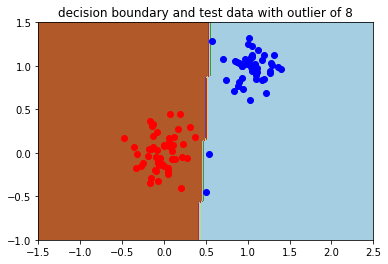

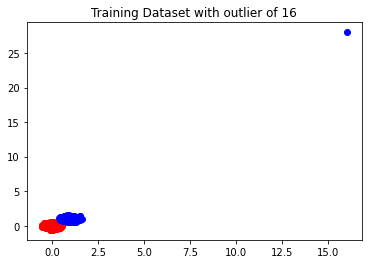

The accuracy rate of 16 outlier is:  0.93


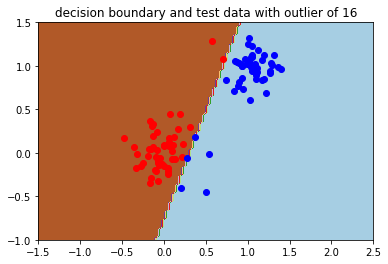

In [19]:
def task1():
    # get data
    for outlier in [1, 2, 4, 8, 16]:
        # get data. xplot, yplot is same as xtrain, ytrain but without outlier
        xtrain, xtest, ytrain, ytest, xplot, yplot = make_data(outlier=outlier)

        # TODO visualize xtrain via scatterplot
        xytrain = np.c_[xtrain, ytrain]
        plt.scatter(xytrain[xytrain[:, 2] == 1][:, 0], xytrain[xytrain[:, 2] == 1][:, 1], color="red")
        plt.scatter(xytrain[xytrain[:, 2] == -1][:, 0], xytrain[xytrain[:, 2] == -1][:, 1], color="blue")
        pltTitle = "Training Dataset with outlier of " + str(outlier)
        plt.title(pltTitle)
        plt.show()
        lls = LinearLeastSquares()
        lls.fit(xtrain, ytrain)

        # TODO evaluate accuracy and decision boundary of LLS
        y_predict = lls.predict(xtest)
        accuracy = np.sum((y_predict * ytest) == 1) / len(ytest)
        print("The accuracy rate of", outlier, "outlier is: ", accuracy)
        x = np.linspace(-1.5, 2.5, 100)
        y = np.linspace(-1.0, 1.5, 100)
        xx, yy = np.meshgrid(x, y)
        z = lls.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        plt.contourf(xx, yy, z, cmap=plt.cm.Paired)
        xytest = np.c_[xtest, y_predict]
        # plt.scatter(xtest[:, 0], xtest[:, 1])
        plt.scatter(xytest[xytest[:, 2] == 1][:, 0], xytest[xytest[:, 2] == 1][:, 1], color="red")
        plt.scatter(xytest[xytest[:, 2] == -1][:, 0], xytest[xytest[:, 2] == -1][:, 1], color="blue")
        plt.xlim(-1.5, 2.5)
        plt.ylim(-1.0, 1.5)
        pltTitle = "decision boundary and test data with outlier of " + str(outlier)
        plt.title(pltTitle)
        plt.show()


if __name__ == "__main__":
    task1()

6. **How is the least square fit affected by the outlier? Give a short explanation.**

The outliers affect the average difference between the training samples and the target values, which affects the decision boundary. In a linear classifier, the slope of the decision boundary is influenced by the outliers.

### Task-2: k-Nearest Neighbors Classification

1. **Visualize the dataset using a scatter plot, with data points colored according to their label. You can use matplotlib or any other plotting library of your choice.(1P)**
2. **Implement the kneighbors method of the KNN class. For given query points, it should return the indices of the k-nearest neighbors in the training set, where k is given by KNN.n_neighbors, together with the distances. Use the euclidean metric for distances. You should only use numpy in your implementation and please make sure that your implementation is vectorized.(2P)**
3. **Implement the predict method of the KNN class. It should return the predicted label for each query point. (1P)**
4. **For k = 5, fit both your kNN implementation and that from sklearn to the training data and check that their predictions on the test set are the same.(1P)**
5. **Evaluate and plot the accuracy of the kNN classifier on the test set against different values of k = 2i, i = 0, . . . , 9. (1P)**
6. **For the same values of k, plot the decision boundary of the kNN classifier with the data points on top. Plot the decision boundary within the box [−1.5, 2.5] × [−1.0, 1.5]. (1P)**

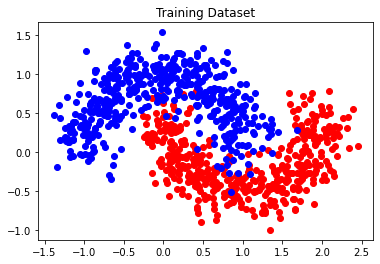

The predict of knn:
 [1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1
 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1] 
The predict of sknn:
 [1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1
 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1]
The accuracy of knn with k = 1 is: 0.94


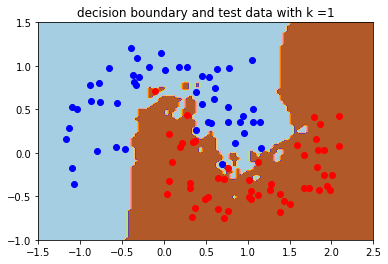

The accuracy of knn with k = 2 is: 0.96


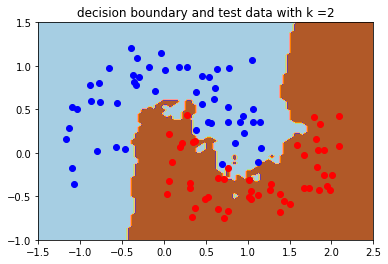

The accuracy of knn with k = 4 is: 0.94


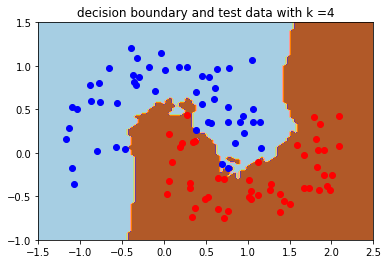

The accuracy of knn with k = 8 is: 0.95


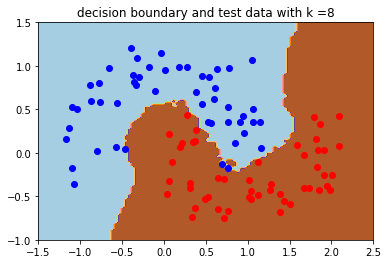

The accuracy of knn with k = 16 is: 0.99


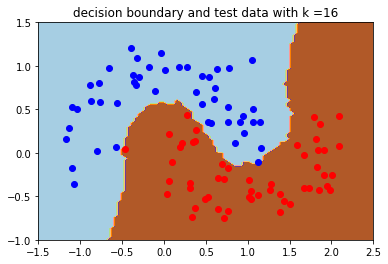

The accuracy of knn with k = 32 is: 0.97


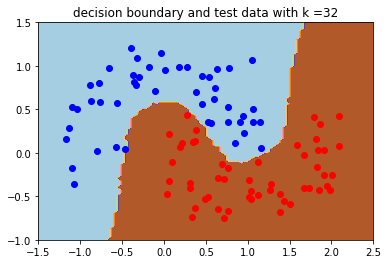

The accuracy of knn with k = 64 is: 0.97


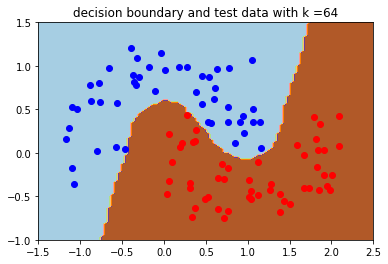

The accuracy of knn with k = 128 is: 0.95


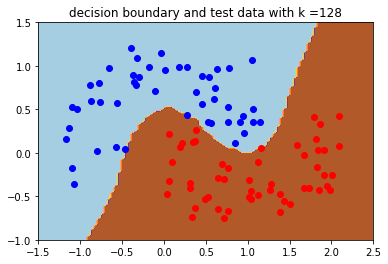

The accuracy of knn with k = 256 is: 0.94


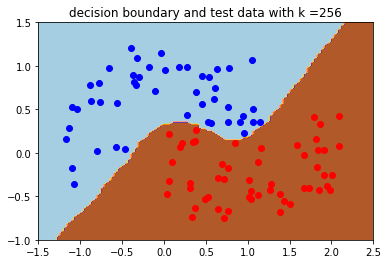

The accuracy of knn with k = 512 is: 0.8


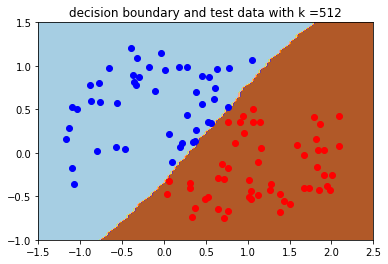

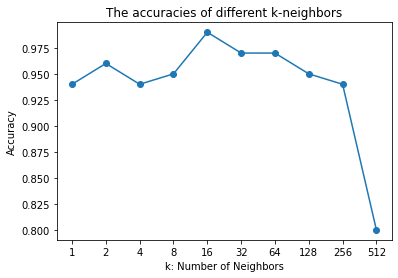

In [20]:
class KNN(object):
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors

    def fit(self, x, y):
        self.x = x
        self.y = y

    def kneighbors(self, xquery):
        # TODO return indices of nearest neighbor points and distances to them
        dist = np.zeros((len(xquery), len(self.x)))
        # because(X - X_train)*(X - X_train) = -2X*X_train + X*X + X_train*X_train, so
        d1 = -2 * (xquery @ self.x.T)
        d2 = np.sum(np.square(xquery), axis=1, keepdims=True)
        d3 = np.sum(np.square(self.x), axis=1)
        dist = np.sqrt(d1 + d2 + d3)
        # dist = np.reshape(np.sum(xquery ** 2, axis=1), (xquery.shape[0], 1)) + np.sum(self.x ** 2, axis=1) - 2 * xquery.dot(self.x.T)
        k_indices = np.argpartition(dist, self.n_neighbors, axis=1)[:, :self.n_neighbors]
        # k_indices = np.argsort(dist, axis=1)[:, :self.n_neighbors]
        k_dist = np.take_along_axis(dist, k_indices, axis=1)
        return k_indices

    def predict(self, xquery):
        # TODO return predicted label for each query point
        y_predict = np.zeros(xquery.shape[0], dtype=int)
        k_indices = self.kneighbors(xquery)
        for i in range(len(xquery)):
            y_knear = self.y[k_indices[i]]
            y_predict[i] = np.argmax(np.bincount(y_knear))
        return y_predict


def task2():
    # get data
    n = 1000
    n_train = 900
    n_test = n - n_train
    x, y = sklearn.datasets.make_moons(n_samples=n, noise=0.2,
                                       random_state=0)
    xtrain, ytrain = x[:n_train, ...], y[:n_train, ...]
    xtest, ytest = x[n_train:, ...], y[n_train:, ...]

    # TODO visualize data via scatterplot
    xytrain = np.c_[xtrain, ytrain]
    plt.scatter(xytrain[xytrain[:, 2] == 1][:, 0], xytrain[xytrain[:, 2] == 1][:, 1], color="red")
    plt.scatter(xytrain[xytrain[:, 2] == 0][:, 0], xytrain[xytrain[:, 2] == 0][:, 1], color="blue")
    plt.title("Training Dataset")
    plt.show()
    # TODO for k=5 check that our implementation predicts the same as that of sklearn.
    k = 5
    sknn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    sknn.fit(xtrain, ytrain)
    knn = KNN(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    y_predict = knn.predict(xtest)
    print("The predict of knn:\n", y_predict, "\nThe predict of sknn:\n", sknn.predict(xtest))
    ks = [2 ** i for i in range(10)]
    accuracy_array = []
    k_array = []
    for k in ks:
        # TODO fit and evaluate accuracy on test data
        k_array.append(str(k))
        knn = KNN(n_neighbors=k)
        knn.fit(xtrain, ytrain)
        y_predict = knn.predict(xtest)
        accuracy = 1 - np.sum((y_predict + ytest) == 1) / len(y_predict)
        accuracy_array.append(accuracy)
        print("The accuracy of knn with k =", k, "is:", accuracy)
        # TODO plot decision boundary
        N = 100
        x = np.linspace(-1.5, 2.5, N)
        y = np.linspace(-1.0, 1.5, N)
        xx, yy = np.meshgrid(x, y)
        z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        plt.contourf(xx, yy, z, cmap=plt.cm.Paired)
        xytest = np.c_[xtest, y_predict]
        # Assign different colors to the scatter by different labels
        plt.scatter(xytest[xytest[:, 2] == 1][:, 0], xytest[xytest[:, 2] == 1][:, 1], color="red")
        plt.scatter(xytest[xytest[:, 2] == 0][:, 0], xytest[xytest[:, 2] == 0][:, 1], color="blue")
        pltTitle = "decision boundary and test data with k =" + str(k)
        plt.title(pltTitle)
        plt.show()
    # A line graph showing the accuracy at different k
    plt.xlabel("k: Number of Neighbors")
    plt.ylabel("Accuracy")
    plt.title("The accuracies of different k-neighbors")
    plt.scatter(k_array, accuracy_array)
    plt.plot(k_array, accuracy_array)
    plt.show()

task2()

7. **What is the effect of k on the decision boundary? What would happen in the case where k equals the number of training examples? (1P)**

An increase in k increases the domain, making the error larger and making the overall model over-simplified and under-fitted. If the value of k is as large as the amount of data, it will make the classifier meaningless.

### Task 3: kNN Classification of Images

1. **Evaluate and plot the accuracy of the kNN classifier on the test set against different values of k = 2i, i = 0, . . . , 3. (2P)**
2. **For k = 8, produce a plot that shows 10 test images together with their k-nearest neighbors. Include examples for both successful and unsuccesful predictions. (2P)**

The plot of prediction was impelmented by Sklearn
The accuracy of sknn with k = 1 is: 0.9911111111111112
The accuracy of sknn with k = 2 is: 0.9844444444444445
The accuracy of sknn with k = 4 is: 0.98
The accuracy of sknn with k = 8 is: 0.9777777777777777


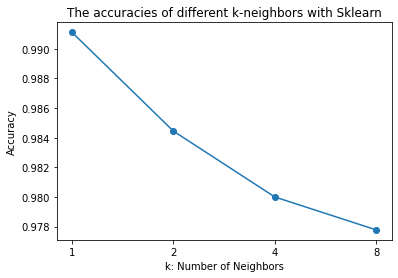

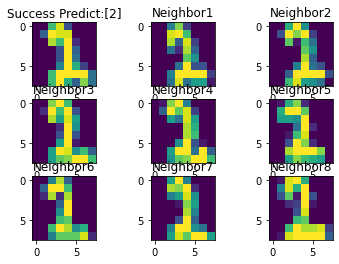

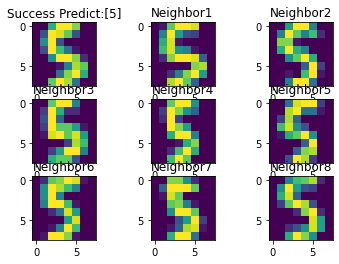

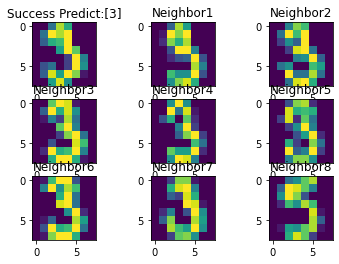

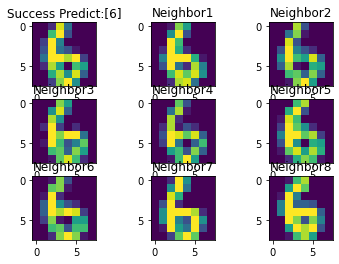

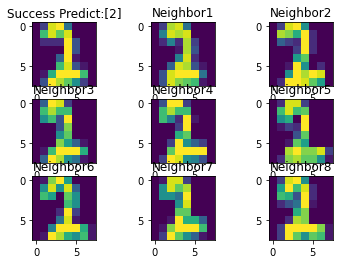

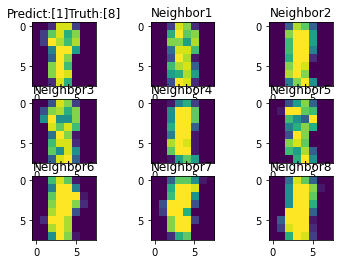

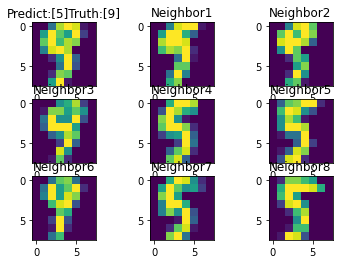

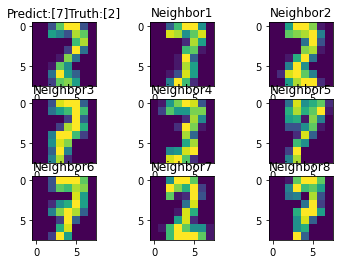

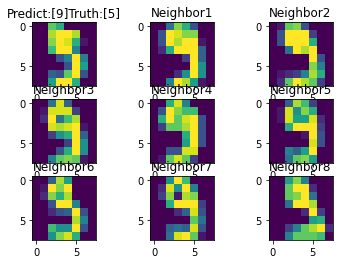

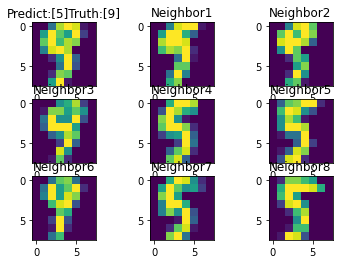

In [24]:
def task3():
    print("The plot of prediction was impelmented by Sklearn")
    data = sklearn.datasets.load_digits()
    x, y = (data.images / 16.0).reshape(-1, 8 * 8), data.target
    xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(
        x, y, test_size=0.25, shuffle=True, random_state=0)

    # TODO analyze accuracy for different values of k
    ks = [2 ** i for i in range(4)]
    accuracy_array = []
    k_array = []
    sucess = []
    fail = []
    for k in ks:
        # TODO fit and evaluate accuracy on test data
        k_array.append(str(k))
        sknn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
        sknn.fit(xtrain, ytrain)
        y_predict = sknn.predict(xtest)
        sum = 0
        for i in range(len(y_predict)):
            if y_predict[i] == ytest[i]:
                sum += 1
                sucess.append(i)
            else:
                fail.append(i)
        accuracy = sum / len(y_predict)
        accuracy_array.append(accuracy)
        print("The accuracy of sknn with k =", k, "is:", accuracy)

    plt.xlabel("k: Number of Neighbors")
    plt.ylabel("Accuracy")
    plt.title("The accuracies of different k-neighbors with Sklearn")
    plt.scatter(k_array, accuracy_array)
    plt.plot(k_array, accuracy_array)
    plt.show()


    # TODO plot nearest neighbors
    # Take 5 from each of the successful and failed test data
    sucess_index = np.random.choice(sucess, 5)
    fail_index = np.random.choice(fail, 5)
    sknn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=8)
    sknn.fit(xtrain, ytrain)
    # Display the test plot and its 8 nearest neighbors using the subplot method
    for i in sucess_index:
        kneighbors = sknn.kneighbors([xtest[i]], return_distance=False)
        plt.subplot(3, 3, 1)
        plt.imshow(xtest[i].reshape([8, 8]))
        pltTitle = "Success Predict:"+str(sknn.predict([xtest[i]]))
        plt.title(pltTitle)
        # print(kneighbors[0])
        num = 2
        for i in kneighbors[0]:
            neighbor = xtrain[i].reshape([8, 8])
            plt.subplot(3, 3, num)
            plt.imshow(neighbor)
            pltTitle = "Neighbor" + str(num - 1)
            plt.title(pltTitle)
            num += 1
        plt.show()

    for i in fail_index:
        kneighbors = sknn.kneighbors([xtest[i]], return_distance=False)
        plt.subplot(3, 3, 1)
        plt.imshow(xtest[i].reshape([8, 8]))
        pltTitle = "Predict:" + str(sknn.predict([xtest[i]]))+"Truth:"+str([ytest[i]])
        plt.title(pltTitle)
        num = 2
        for i in kneighbors[0]:
            neighbor = xtrain[i].reshape([8, 8])
            plt.subplot(3, 3, num)
            plt.imshow(neighbor)
            pltTitle = "Neighbor" + str(num - 1)
            plt.title(pltTitle)
            num += 1
        plt.show()
        
        
task3()